# Trabalho Materia Aplicações em Multimidia PUCPR 
## Este notebook tem como objetivo de realizar classificação de músicas por gênero musical. 
### Utilizamos a base do kaggle https://www.kaggle.com/andradaolteanu/gtzan-dataset-music-genre-classification 
### Para a extração de características foi utilizada a biblioteca librosa. https://librosa.org/


#### Desenvolvedora: Cinthya Oestreich Silva

In [ ]:
import os
import librosa.display
import librosa
import numpy as np
import scipy.io as sio
import pandas as pd
import IPython.display as ipd

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network  import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import manifold, datasets
from sklearn.manifold.t_sne import TSNE
from sklearn.datasets.base import load_digits
import itertools
import pandas as pd
import seaborn as sns
import urllib
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
pip install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.1.4)


In [ ]:
#Neste passo realizamos o download da base de dados
! kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification


 98% 1.19G/1.21G [00:21<00:00, 56.8MB/s]
100% 1.21G/1.21G [00:22<00:00, 59.0MB/s]


In [ ]:
#Neste passo realizamos o unzip da pasta no meu repositorio do google drive
%cd /content/drive/My Drive/Ciências de Dados/Kaggle
!ls
!unzip \*.zip  && rm *.zip


/content/drive/My Drive/Ciências de Dados/Kaggle
gtzan-dataset-music-genre-classification.zip  kaggle.json
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wav  
  inf

In [ ]:
%cd Data/genres_original

/content/drive/My Drive/Ciências de Dados/Kaggle/Data/genres_original


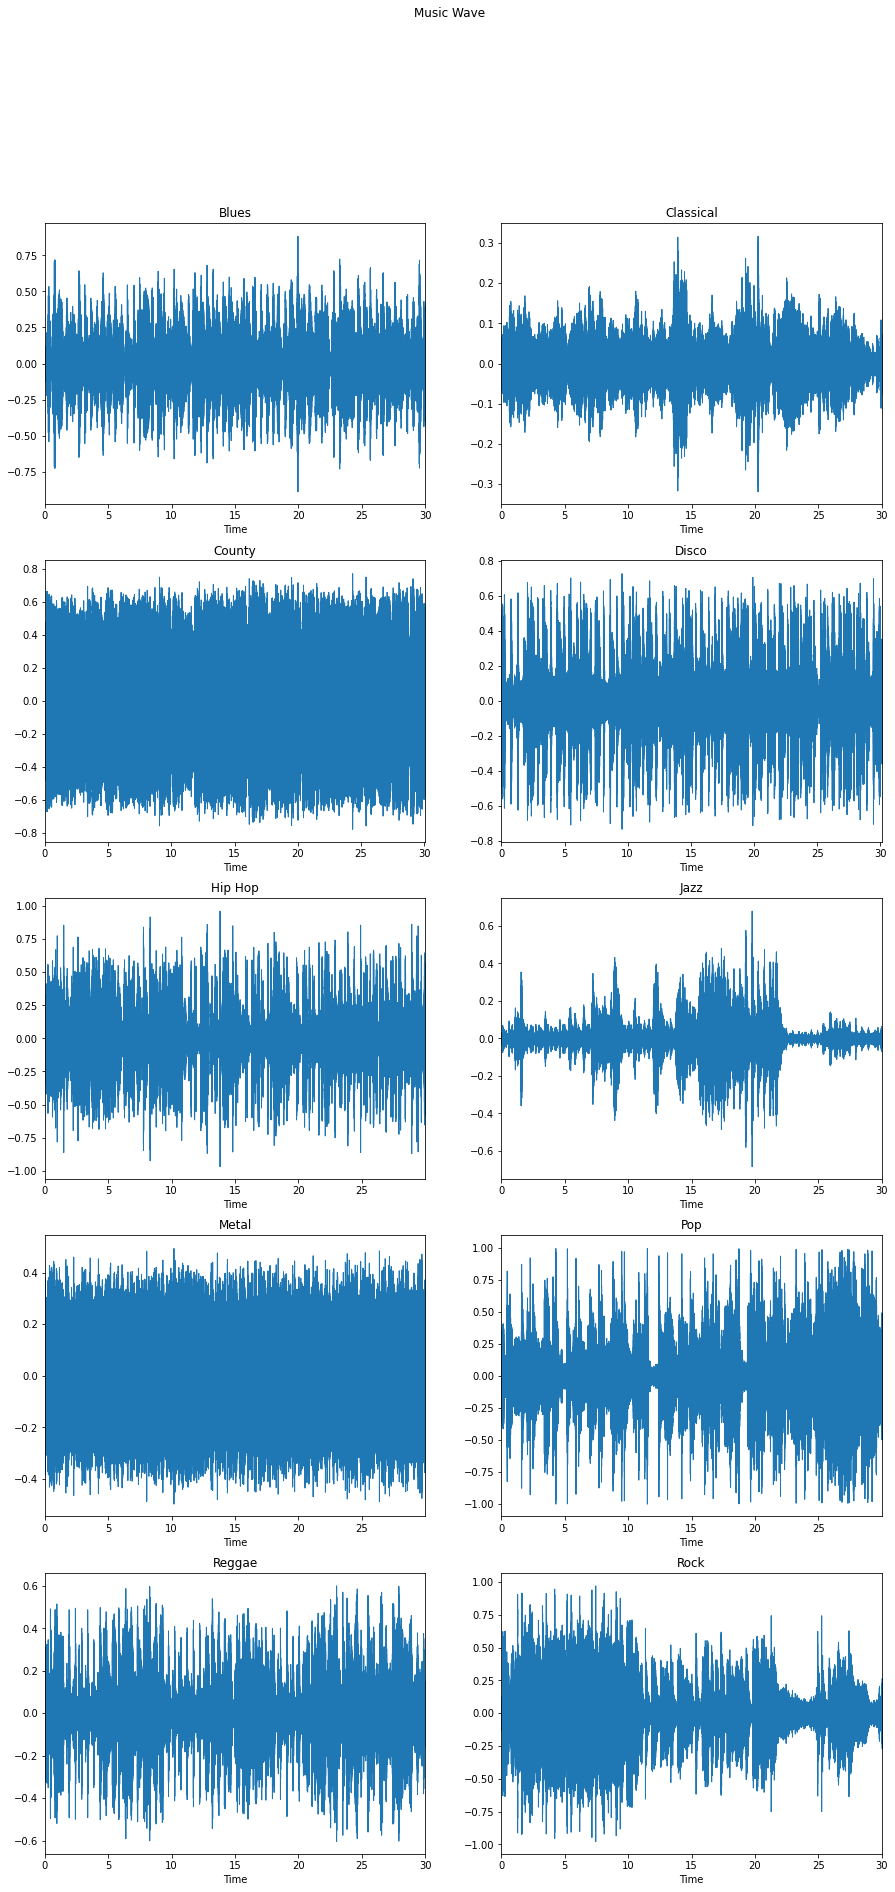

In [ ]:
#Vamos agora verificar gráficamente como que as caracteeristicas apresentadas acima aparecem. 
# O primeiro gráfico são os gráficos de spectro das músicas 

x, sr = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00000.wav')
x1, sr1 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/classical/classical.00000.wav')
x2, sr2 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/country/country.00000.wav')
x3, sr3 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/disco/disco.00000.wav')
x4, sr4 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/hiphop/hiphop.00000.wav')
x5, sr5 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/jazz/jazz.00000.wav')
x6, sr6 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/metal/metal.00000.wav')
x7, sr7 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/pop/pop.00000.wav')
x8, sr8 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/reggae/reggae.00000.wav')
x9, sr9 = librosa.load(r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original/rock/rock.00000.wav')

plt.figure(figsize=(15, 30))
plt.subplot(521)
plt.title("Blues")
librosa.display.waveplot(x, sr=sr)
plt.subplot(522)
plt.title("Classical")
librosa.display.waveplot(x1, sr=sr1)
plt.subplot(523)
plt.title("County")
librosa.display.waveplot(x2, sr=sr2)
plt.subplot(524)
plt.title("Disco")
librosa.display.waveplot(x3, sr=sr3)
plt.subplot(525)
plt.title("Hip Hop")
librosa.display.waveplot(x4, sr=sr4)
plt.subplot(526)
plt.title("Jazz")
librosa.display.waveplot(x5, sr=sr5)
plt.subplot(527)
plt.title("Metal")
librosa.display.waveplot(x6, sr=sr6)
plt.subplot(528)
plt.title("Pop")
librosa.display.waveplot(x7, sr=sr7)
plt.subplot(529)
plt.title("Reggae")
librosa.display.waveplot(x8, sr=sr8)
plt.subplot(5,2,10)
plt.title("Rock")
librosa.display.waveplot(x9, sr=sr9)
plt.suptitle('Music Wave')
plt.show()

## Extração de características 
### 1- Zero crossing rate:  É a quantidade de vezes que um um sinal muda de positivo para negativo ou de negativo para positivo. 
### 2- Spectral centroid: É uma medida usada em processamento digital de sinais para caraterizar um spectro. Ele indica onde está o centro de massa no spectro. Percentualmente está mendida tem uma conexão com a impressão do brilho do som (Timbre). Lembrando que os pesquisadores do timbre consideram o brilho uma das distinções perceptivelmente mais fortes entre os sons.
### 3- Spectral Rolloff: O ponto de rolloff espectral é a fração de compartimentos no espectro de potência em que 85% da potência está em frequências mais baixas.


---


#### Possivel solução utilizando o Tensor Flow 
#### tf.audio.decode_wav(audio_binary) 


In [ ]:

ipd.Audio("/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00000.wav")

In [ ]:
ipd.Audio("/content/drive/My Drive/Bases/Kaggle/Data/genres_original/jazz/jazz.00000.wav")

In [ ]:
ipd.Audio("/content/drive/My Drive/Bases/Kaggle/Data/genres_original/metal/metal.00000.wav")

In [ ]:
ipd.Audio("/content/drive/My Drive/Bases/Kaggle/Data/genres_original/pop/pop.00000.wav")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


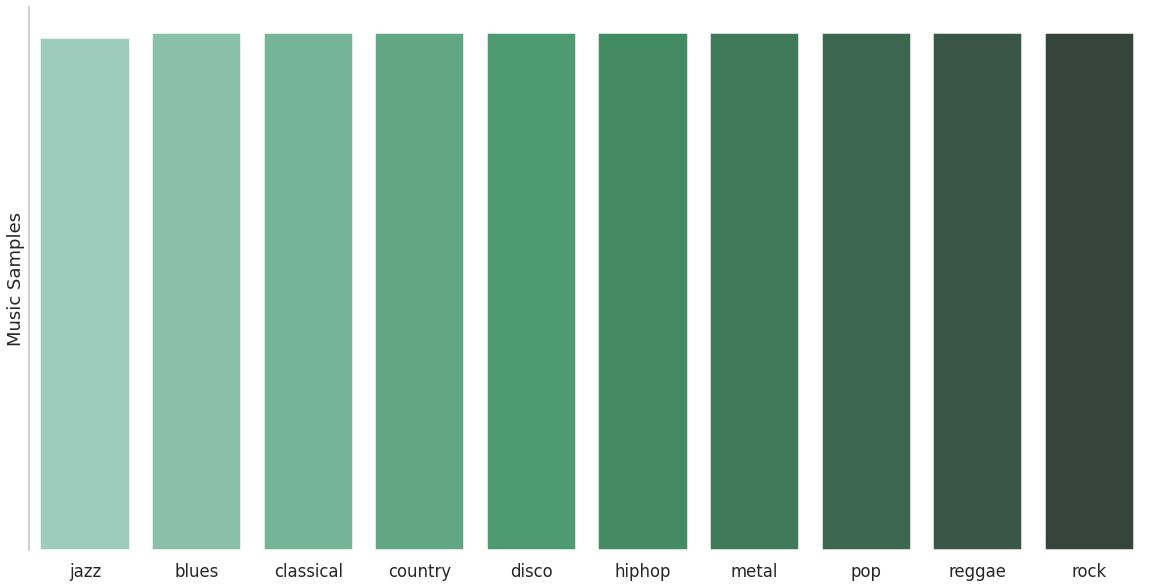

In [ ]:
y_graph=[0,0,0,0,0,0,0,0,0,0]

for i in y: 
  if i =="jazz":
    y_graph[0]=y_graph[0]+1
  elif i=="blues":
    y_graph[1]=y_graph[1]+1
  elif i=="classical":
    y_graph[2]=y_graph[2]+1
  elif i=="country":
    y_graph[3]=y_graph[3]+1
  elif i=="disco":
    y_graph[4]=y_graph[4]+1
  elif i=="hiphop":
    y_graph[5]=y_graph[5]+1
  elif i=="metal":
    y_graph[6]=y_graph[6]+1
  elif i=="pop":
    y_graph[7]=y_graph[7]+1
  elif i=="reggae":
    y_graph[8]=y_graph[8]+1
  elif i=="rock":
    y_graph[9]=y_graph[9]+1

def sns_plota_barra(x,y):
   sns.set(style="whitegrid", context="talk")
   f, (ax1) = plt.subplots(1, 1, figsize=(20, 10), sharex=True)
   sns.barplot(x, y, palette="BuGn_d", ax=ax1)
   ax1.set_ylabel("Music Samples")
   sns.despine(bottom=True)
   plt.setp(f.axes, yticks=[])
   plt.show()

class_names=['jazz','blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']
sns_plota_barra(class_names,y_graph)

In [ ]:
#Spectral off
#https://musicinformationretrieval.com/spectral_features.html


In [ ]:
base_dir = r'/content/drive/My Drive/Bases/Kaggle/Data/genres_original'

# Lê todos os diretórios
folder_list = os.listdir(base_dir)
print(len(folder_list), "classes encontradas na base")

# Cria as listas de categorias, instâncias e rótulos para treinamento
x = []
y = []
sr=[]
features=[]
aux=[]


for folder_name in folder_list:
  files_list = os.listdir(os.path.join(base_dir, folder_name))
  print(folder_name)
  for file_name in files_list:
    print(os.path.join(base_dir, folder_name, file_name))
    x, sr = librosa.load(os.path.join(base_dir, folder_name, file_name))
    #sr, x = sio.wavfile.read(os.path.join(base_dir, folder_name, file_name))

    #Calcula o zero_Crossing na musica inteira:      
    zero_crossings = librosa.zero_crossings(x, pad=False)
    zcr = sum(zero_crossings)
    aux.append(zcr)      
    #Calcula os spectral centroids:
    spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)      

    #Obtem a media:
    spect_mean = np.mean(spectral_centroids)
    aux.append(spect_mean)
    #Obtem o desvio padrao:
    spect_std = np.std(spectral_centroids)
    aux.append(spect_std)
    #Calcula os spectral rolloff:
    spectral_rolloff = librosa.feature.spectral_centroid(x, sr=sr)      

    #Obtem a media:
    spect_rolloff_mean = np.mean(spectral_rolloff)
    aux.append(spect_rolloff_mean)
    #Obtem o desvio padrao:
    spect_rolloff_std = np.std(spectral_rolloff)
    aux.append(spect_rolloff_std)
    features.append(aux)
    y.append(folder_name)
    aux=[]



10 classes encontradas na base
blues
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00005.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00001.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00006.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00003.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00004.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00000.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00002.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00007.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00012.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00019.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00011.wav
/content/drive/My Drive/Bases/Kaggle/Data/genres_original/blues/blues.00014.wav
/co

In [ ]:
import pandas as pd 
DF = pd.DataFrame(features)
pd.DataFrame(features).to_csv("features.csv")
pd.DataFrame(y).to_csv("y.csv")



In [ ]:
y=np.asarray(y)
print(y.shape)
features=np.asarray(features)
print(features.shape)
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.3, random_state=42, stratify=y)

(999,)
(999, 5)


In [ ]:
rng = np.random.RandomState(456)

# Define single classifiers

lr = LogisticRegression(C=1e5,solver='lbfgs',max_iter = 500)
dt =  DecisionTreeClassifier(criterion='entropy')
knn = KNeighborsClassifier(n_neighbors=4)
#mlp = MLPClassifier(solver='sgd', early_stopping=False, hidden_layer_sizes=(200), activation='logistic', batch_size=100, max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=rng)
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
nb = GaussianNB(var_smoothing=1e-09)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#rf = RandomForestClassifier(max_features = 'auto',max_depth= 8 ,criterion ='entropy', n_estimators=200, random_state=50, oob_score = True)


xgb = XGBClassifier(  learning_rate=0.1,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=10,
                      min_child_weight=1)

cb = VotingClassifier(estimators=[('RandomFlorest', rf),('Decision Tree',dt)], voting='soft')


titles = ['LogisticRegresson', 'DecisionTree', 'KNN', 'NaiveBayes', 'MLP', 'RF', 'RF+DT','XGB']
methods = [lr, dt, knn, nb, mlp, rf, cb,xgb]

In [ ]:
scores = []
for method, name in zip(methods, titles):
    method.fit(X_train, y_train)
    scores.append(method.score(X_test, y_test))
    print("Classification accuracy {} = {}"
          .format(name, method.score(X_test, y_test)))
print(scores)

Classification accuracy LogisticRegresson = 0.25666666666666665
Classification accuracy DecisionTree = 0.31333333333333335
Classification accuracy KNN = 0.24333333333333335
Classification accuracy NaiveBayes = 0.36666666666666664
Classification accuracy MLP = 0.10666666666666667
Classification accuracy RF = 0.35
Classification accuracy RF+DT = 0.32
Classification accuracy XGB = 0.36
[0.25666666666666665, 0.31333333333333335, 0.24333333333333335, 0.36666666666666664, 0.10666666666666667, 0.35, 0.32, 0.36]


In [ ]:
#print(y)

LogisticRegresson


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


jazz     blues  classical  ...       pop    reggae  rock
F1-Score   0.0  0.292683        0.0  ...  0.257576  0.355556   0.0
Precisão   0.0  0.545455        0.0  ...  0.166667  0.266667   0.0
Recall     0.0  0.200000        0.0  ...  0.566667  0.533333   0.0

[3 rows x 10 columns]



DecisionTree


jazz     blues  classical  ...       pop    reggae      rock
F1-Score  0.260870  0.693878   0.179104  ...  0.370370  0.296296  0.200000
Precisão  0.230769  0.894737   0.162162  ...  0.416667  0.333333  0.250000
Recall    0.300000  0.566667   0.200000  ...  0.333333  0.266667  0.166667

[3 rows x 10 columns]



KNN


jazz     blues  classical  ...       pop    reggae      rock
F1-Score  0.260000  0.561404   0.160000  ...  0.307692  0.153846  0.107143
Precisão  0.185714  0.592593   0.133333  ...  0.363636  0.333333  0.115385
Recall    0.433333  0.533333   0.200000  ...  0.266667  0.100000  0.100000

[3 rows x 10 columns]



NaiveBayes


jazz     blues  classical  ...       pop    reggae      rock
F1-Score  0.281690  0.626506   0.268657  ...  0.548387  0.333333  0.060606
Precisão  0.243902  0.490566   0.243243  ...  0.531250  0.444444  0.333333
Recall    0.333333  0.866667   0.300000  ...  0.566667  0.266667  0.033333

[3 rows x 10 columns]



MLP


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


jazz  blues  classical   country  ...  metal  pop  reggae  rock
F1-Score   0.0    0.0        0.0  0.099010  ...    0.0  0.0     0.0   0.0
Precisão   0.0    0.0        0.0  0.070423  ...    0.0  0.0     0.0   0.0
Recall     0.0    0.0        0.0  0.166667  ...    0.0  0.0     0.0   0.0

[3 rows x 10 columns]



RF


jazz     blues  classical  ...       pop    reggae      rock
F1-Score  0.301370  0.644068   0.172414  ...  0.500000  0.411765  0.200000
Precisão  0.255814  0.655172   0.178571  ...  0.538462  0.368421  0.250000
Recall    0.366667  0.633333   0.166667  ...  0.466667  0.466667  0.166667

[3 rows x 10 columns]



RF+DT


jazz     blues  classical  ...       pop    reggae      rock
F1-Score  0.303030  0.692308   0.184615  ...  0.392857  0.344828  0.210526
Precisão  0.277778  0.818182   0.171429  ...  0.423077  0.357143  0.222222
Recall    0.333333  0.600000   0.200000  ...  0.366667  0.333333  0.200000

[3 rows x 10 columns]



XGB


jazz     blues  classical  ...       pop    reggae  rock
F1-Score  0.280702  0.704225   0.136364  ...  0.593750  0.285714   0.0
Precisão  0.296296  0.609756   0.214286  ...  0.558824  0.272727   0.0
Recall    0.266667  0.833333   0.100000  ...  0.633333  0.300000   0.0

[3 rows x 10 columns]

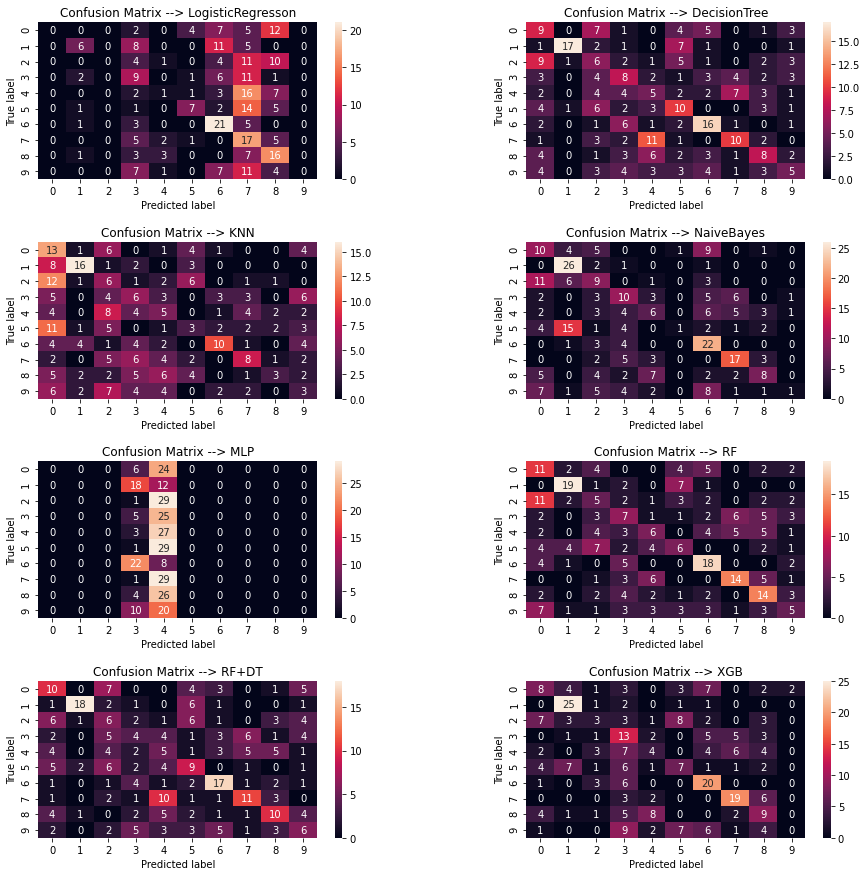

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting the Confusion Matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from IPython.display import display

fig3, sub1 = plt.subplots(4, 2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
class_names=['jazz','blues', 'classical','country','disco','hiphop','metal','pop','reggae','rock']
for clf, ax, title in zip(methods, sub1.flatten(), titles):
    y_predicted = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    #plot_confusion_matrix(ax, cm, title)
    df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    sns.heatmap(df_cm, annot=True, ax=ax, fmt = 'd')
    ax.set_title('Confusion Matrix --> ' + title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    fScore = f1_score(y_test, y_predicted ,average=None)
    precision = precision_score(y_test, y_predicted ,average=None)
    recall = recall_score(y_test, y_predicted ,average=None)
    
    numpy_data = np.array([fScore,precision,recall]) 
    df = pd.DataFrame(data=numpy_data, index=["F1-Score", "Precisão","Recall"], columns = class_names)
    print(title )
    #print(df)
    display(df)
    print('\n')

plt.show()
plt.tight_layout()

## Abaixo é possivel observar o F1-score, precisão e Recall do treinamento de apenas 50% da base, ou seja 50 músicas por classe.

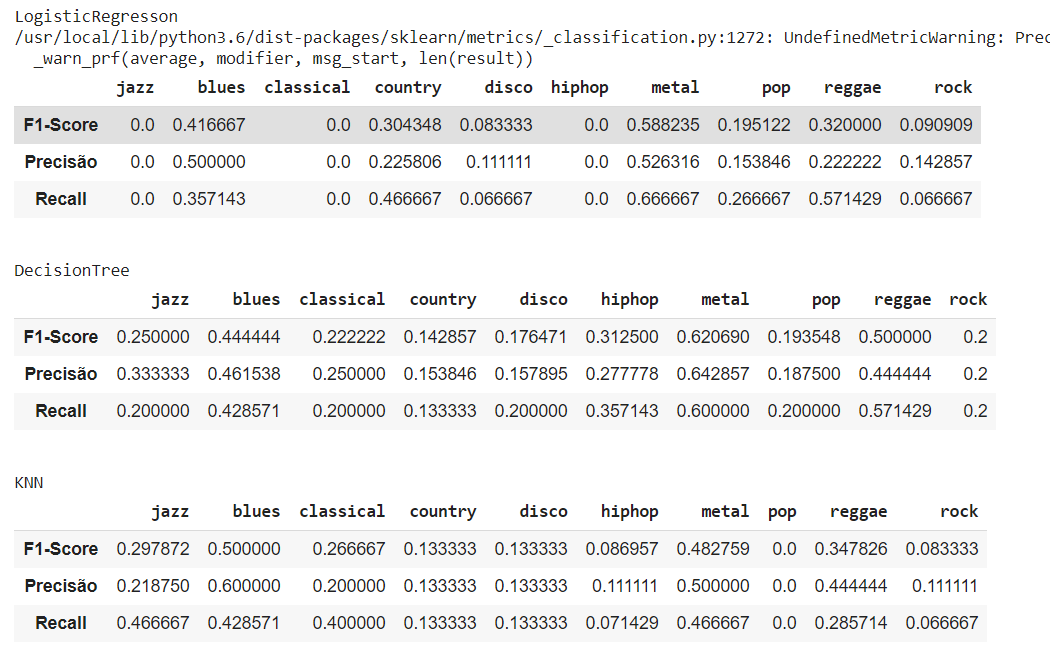

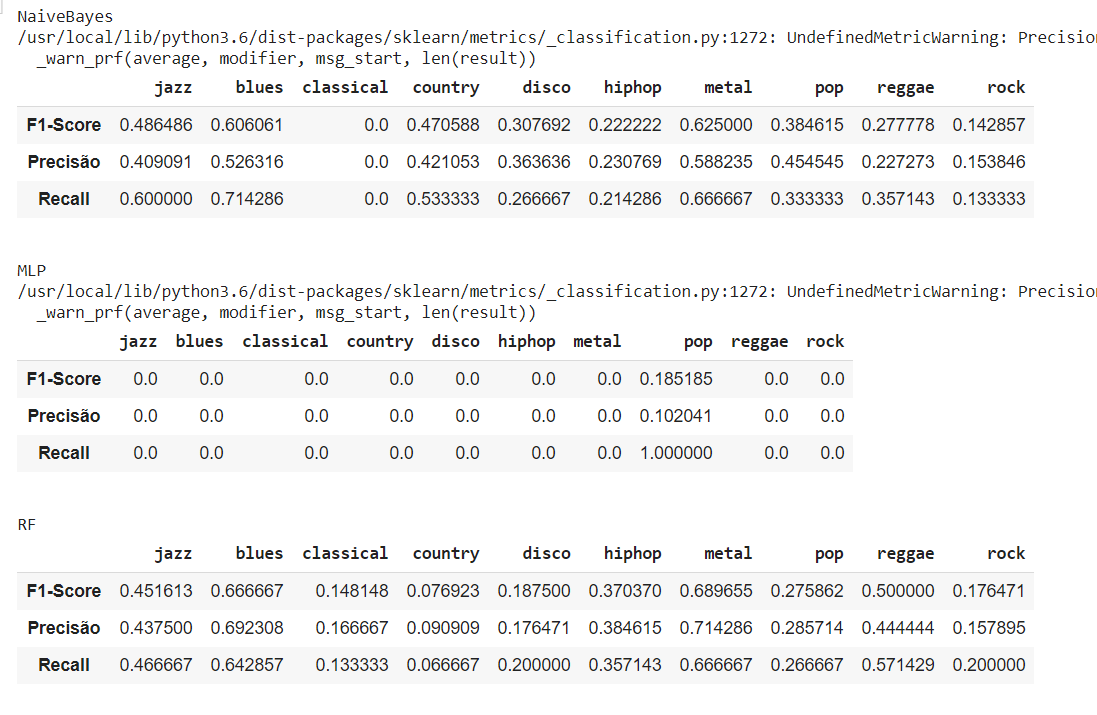

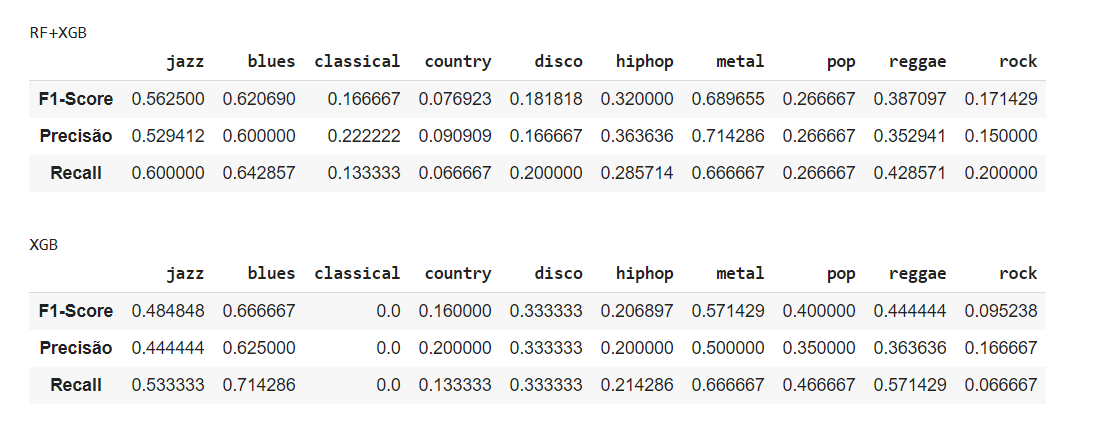

## Abaixo temos uma comparação entre uma base treinada com 500 amostras e outra com 1000 amostras. 
### A primeira figura são as 500 amostras e a segunda figura são as 1000 amostras. 


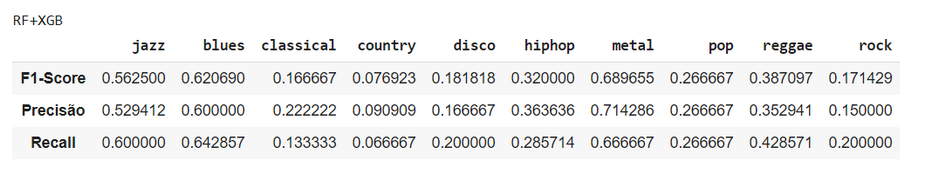

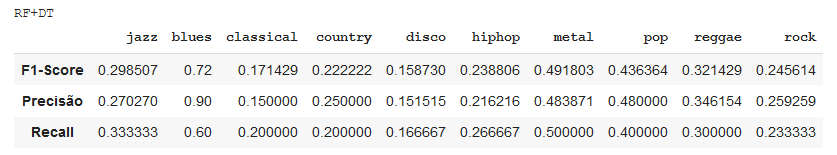